In [42]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
print(len(X_train))
print(len(X_test))

60000
10000


In [45]:
X_train[0].shape # 28x28 pixle image of handwritten digit

(28, 28)

In [46]:
X_train[0] # pixle value is between 0 to 255(0=black, 255=white)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

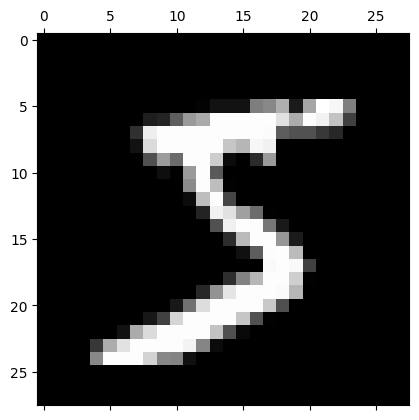

In [47]:
plt.matshow(X_train[0])

In [48]:
y_train[0]

5

In [49]:
# convert 28x28 matrix into a single dimension matrix (1 column)-(28x28=784 rows)
X_train.shape # (6000, 28, 28)

(60000, 28, 28)

In [55]:
# scale the value to (0 to 1) from (0 to 255) for better accuracy
X_train = X_train/255
X_test = X_test/255

In [56]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) # X_train_flattened is 60000 rows with 784rows in each row(28x28 -> 1x784)
print(X_train_flattened)
print(X_train_flattened.shape) 
# 60000 images
# each image with 784 pixle values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(60000, 784)


In [57]:
X_test_flattened = X_test.reshape(len(X_test), 28*28) # X_train_flattened is 60000 rows with 784rows in each row
print(X_test_flattened)
print(X_test_flattened.shape) 
# 10000 images
# each image with 784 pixle values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 784)


Now we will create a simple Neural Network with 2 layers(input and output)

In [58]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

## Define NN 
# Sequential -> means we are having a stack of layers in our NN 
# Dense -> means all the neurons in one layer is connected to all the neurons in the next layer
# keras.layers.Dense(no_of_output_neurons, input_shape, activation_function)

## Compile NN
# optimizer -> allow you to train efficiently, when the backward propogation and training is going on. Optimizer will allow you to reach to global optima in efficient way.
# loss -> loss function
# metrics = ["accuracy"] -> when NN is compiling our goal is to make it more accurate

## Training NN
# model.fit(input, output, epocs)

c:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\.ml_algo_py_venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8196 - loss: 0.7108
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9127 - loss: 0.3091
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9194 - loss: 0.2865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9243 - loss: 0.2730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2708


In [60]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9168 - loss: 0.3007


[0.2650074362754822, 0.9277999997138977]

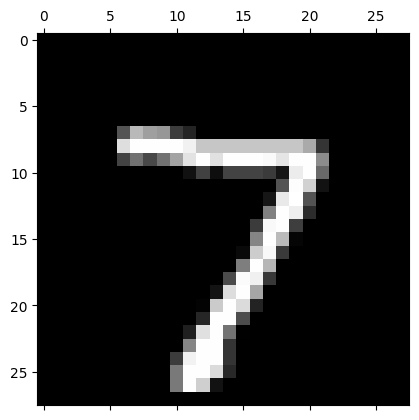

In [61]:
plt.matshow(X_test[0])

In [62]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0] # gives prediction for every digit value from 0 to 9

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.4935644e-02, 3.3260457e-07, 7.1952954e-02, 9.4594294e-01,
       1.5610431e-03, 1.2092846e-01, 1.4276449e-06, 9.9976110e-01,
       1.0001540e-01, 6.6782188e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[0])

7

Add hidden layer in model to improve it

In [64]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"), # hidden layers as 100 neurons(from hit and trial)
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)

# since we have hidden layer the model will take more time to train

c:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\.ml_algo_py_venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8633 - loss: 0.4721
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9611 - loss: 0.1323
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0881
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9800 - loss: 0.0647
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0503


In [65]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9742 - loss: 0.0847


[0.07303941994905472, 0.9775999784469604]

accuracy improved from 92% to 97%